In [1]:
%matplotlib inline
import pandas as pd
import uproot
import awkward
import matplotlib.pyplot as plt
import numpy as np
import math
import numba
from matplotlib.colors import LogNorm
import uproot_methods
import glob
from tqdm.auto import tqdm
import gzip
import pickle

from yahist import Hist2D

In [2]:
def get_df(year=2018):
    pattern = "/home/users/namin/2019/scouting/repo/beamspot/outputs_full{}/*.csv".format(year)
    dfc = pd.concat(map(pd.read_csv,tqdm(glob.glob(pattern))))
    dfc[["x","y","z"]] = dfc[["x","y","z"]].astype("float32")
    dfc[["run","lumi"]] = dfc[["run","lumi"]].astype("int32")
    dfc = dfc.sort_values(["run","lumi"])
    return dfc

In [3]:
df_2017 = get_df(year=2017)
df_2018 = get_df(year=2018)

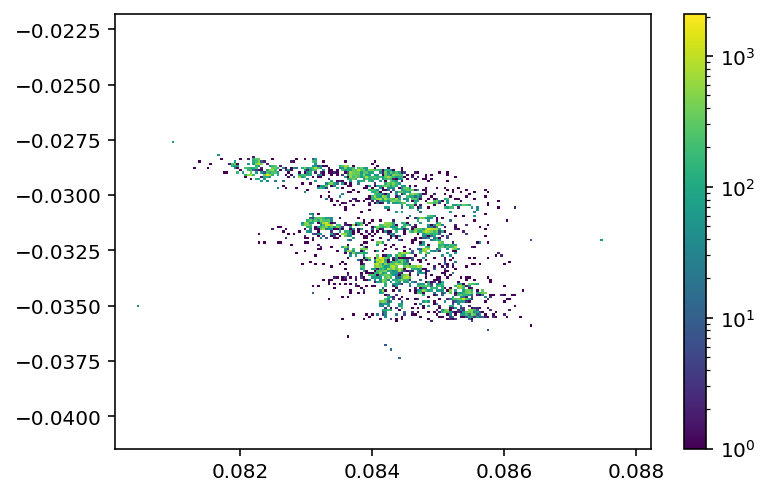

In [4]:
Hist2D(df_2017[["x","y"]].values,bins=[
    np.linspace(df_2017.x.mean()-df_2017.x.std()*5,df_2017.x.mean()+df_2017.x.std()*5,200),
    np.linspace(df_2017.y.mean()-df_2017.y.std()*5,df_2017.y.mean()+df_2017.y.std()*5,200),
]).plot(logz=True)

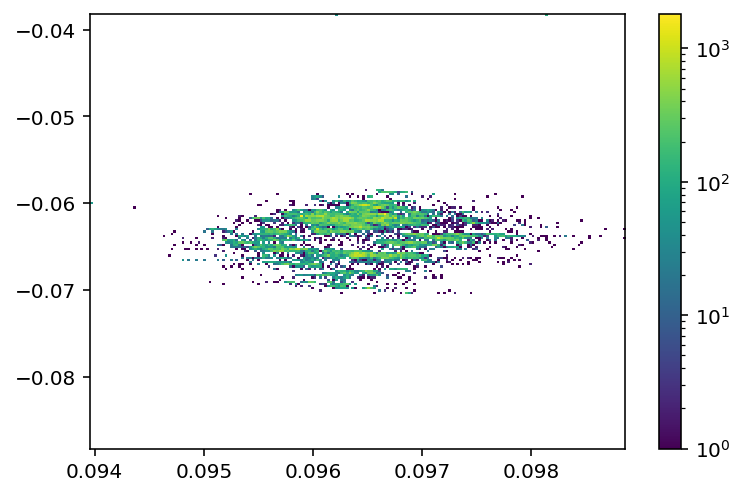

In [5]:
Hist2D(df_2018[["x","y"]].values,bins=[
    np.linspace(df_2018.x.mean()-df_2018.x.std()*5,df_2018.x.mean()+df_2018.x.std()*5,200),
    np.linspace(df_2018.y.mean()-df_2018.y.std()*5,df_2018.y.mean()+df_2018.y.std()*5,200),
]).plot(logz=True)

In [6]:
def dump_df(df, fname_out):
    d = []
    for run,lumi,x,y,z in tqdm(df[["run","lumi","x","y","z"]].values):
        run = int(run)
        lumi = int(lumi)
        d.append([run,lumi,float(x),float(y),float(z)])
    d.append([0,0] + df[["x","y","z"]].mean(axis=0).values.tolist())
    with gzip.open(fname_out,"wb") as fh:
        pickle.dump(d,fh,2)
        
dump_df(df_2017, "beamspots_2017.pkl.gz")
dump_df(df_2018, "beamspots_2018.pkl.gz")

# Manually copy into ../batch/data/ to be used for babymaking